In [2]:
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from collections import Counter
import pandas as pd
import math
import numpy as np

# ORGANIZAÇÃO DOS DADOS
accent_uri = 'https://raw.githubusercontent.com/renathavictor/machine-learning/main/datasets/accent-recognition/accent-mfcc-data-1.csv'
leaf_uri = 'https://raw.githubusercontent.com/renathavictor/machine-learning/main/datasets/leaf/leaf.csv'
abalone_uri = 'https://raw.githubusercontent.com/renathavictor/machine-learning/main/datasets/abalone/abalone.data'

dataset_accent = pd.read_csv(accent_uri, header=0)
dataset_leaf = pd.read_csv(leaf_uri, header=None)
dataset_abalone = pd.read_csv(abalone_uri, header=None)

# Modificar atributos categoricos
dataset_abalone[0] = dataset_abalone[0].replace('F', 0)
dataset_abalone[0] = dataset_abalone[0].replace('M', 1)
dataset_abalone[0] = dataset_abalone[0].replace('I', 2)

dataset_accent['language'] = dataset_accent['language'].replace('ES', 0)
dataset_accent['language'] = dataset_accent['language'].replace('FR', 1)
dataset_accent['language'] = dataset_accent['language'].replace('GE', 2)
dataset_accent['language'] = dataset_accent['language'].replace('IT', 3)
dataset_accent['language'] = dataset_accent['language'].replace('UK', 4)
dataset_accent['language'] = dataset_accent['language'].replace('US', 5)

# Atributos (Features) e Saida
X_accent = dataset_accent.drop(dataset_accent.columns[0], axis = 1)
X_leaf = dataset_leaf.drop(dataset_leaf.columns[0], axis = 1)
X_abalone = dataset_abalone.drop(dataset_abalone.columns[0], axis = 1)

y_accent = dataset_accent[dataset_accent.columns[0]]
y_leaf = dataset_leaf[dataset_leaf.columns[0]]
y_abalone = dataset_abalone[dataset_abalone.columns[0]]

# Transforma para Array NumPy

X_accent = np.array(X_accent)
X_leaf = np.array(X_leaf)
X_abalone = np.array(X_abalone)

y_accent = np.array(y_accent)
y_leaf = np.array(y_leaf)
y_abalone = np.array(y_abalone)


In [ ]:
# k-fold cross-validation
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

folds = 10

kf = StratifiedKFold(n_splits = folds)

X_train_accent, X_train_leaf, X_train_abalone = [], [], []
X_test_accent, X_test_leaf, X_test_abalone = [], [], []
y_train_accent, y_train_leaf, y_train_abalone = [], [], []
y_test_accent, y_test_leaf, y_test_abalone = [], [], []

def cross_validation(arr_xtrain, arr_xtest, arr_ytrain, arr_ytest, X, y):
  for train_index, test_index in kf.split(X,y):
    arr_xtrain.append(X[train_index])
    arr_xtest.append(X[test_index])
    
    arr_ytrain.append(y[train_index])
    arr_ytest.append(y[test_index])

cross_validation(X_train_accent, X_test_accent, y_train_accent, y_test_accent, X_accent, y_accent)
cross_validation(X_train_leaf, X_test_leaf, y_train_leaf, y_test_leaf, X_leaf, y_leaf)
cross_validation(X_train_abalone, X_test_abalone, y_train_abalone, y_test_abalone, X_abalone, y_abalone)


In [4]:
# Arvore de decisao

def arvore_decisao(criterion, X_train, X_test, y_train, y_test):
  model = tree.DecisionTreeClassifier(criterion=criterion)
  model = model.fit(X_train, y_train)

  result = model.predict(X_test)
  acc = metrics.accuracy_score(result, y_test)
  show = round(acc * 100)
  return {
      'show': show,
      'result': result,
      'acc': acc
  }

tree_accent_entropy, tree_leaf_entropy, tree_abalone_entropy = [], [], []
tree_accent_gini, tree_leaf_gini, tree_abalone_gini = [], [], []

for i in range(folds):
  # Entropy
  accent_entropy = arvore_decisao('entropy', X_train_accent[i], X_test_accent[i], y_train_accent[i], y_test_accent[i])
  leaf_entropy = arvore_decisao('entropy', X_train_leaf[i], X_test_leaf[i], y_train_leaf[i], y_test_leaf[i])
  abalone_entropy = arvore_decisao('entropy', X_train_abalone[i], X_test_abalone[i], y_train_abalone[i], y_test_abalone[i])
  tree_accent_entropy.append(accent_entropy)
  tree_leaf_entropy.append(leaf_entropy)
  tree_abalone_entropy.append(abalone_entropy)
  # Gini
  accent_gini = arvore_decisao('gini', X_train_accent[i], X_test_accent[i], y_train_accent[i], y_test_accent[i])
  leaf_gini = arvore_decisao('gini', X_train_leaf[i], X_test_leaf[i], y_train_leaf[i], y_test_leaf[i])
  abalone_gini = arvore_decisao('gini', X_train_abalone[i], X_test_abalone[i], y_train_abalone[i], y_test_abalone[i])

  tree_accent_gini.append(accent_gini)
  tree_leaf_gini.append(leaf_gini)
  tree_abalone_gini.append(abalone_gini)


In [5]:
# KNN - Vizinhos com distancia euclidean

def classifica_knn(k, X_train, X_test, y_train, y_test):
  model = KNeighborsClassifier(n_neighbors=k, metric='euclidean', algorithm='brute')
  model = model.fit(X_train,  y_train)

  result = model.predict(X_test)
  acc = metrics.accuracy_score(result, y_test)
  show = round(acc * 100)
  return {
    'show': show,
    'result': result,
    'acc': acc
  }

knn_accent_5 = []
knn_leaf_5 = []
knn_abalone_5 = []
knn_accent_10 = []
knn_leaf_10 = []
knn_abalone_10 = []

for i in range(folds):
  accent_5 = classifica_knn(5, X_train_accent[i], X_test_accent[i], y_train_accent[i], y_test_accent[i])
  leaf_5 = classifica_knn(5, X_train_leaf[i], X_test_leaf[i], y_train_leaf[i], y_test_leaf[i])
  abalone_5 = classifica_knn(5, X_train_abalone[i], X_test_abalone[i], y_train_abalone[i], y_test_abalone[i])

  accent_10 = classifica_knn(10, X_train_accent[i], X_test_accent[i], y_train_accent[i], y_test_accent[i])
  leaf_10 = classifica_knn(10, X_train_leaf[i], X_test_leaf[i], y_train_leaf[i], y_test_leaf[i])
  abalone_10 = classifica_knn(10, X_train_abalone[i], X_test_abalone[i], y_train_abalone[i], y_test_abalone[i])

  knn_accent_5.append(accent_5)
  knn_leaf_5.append(leaf_5)
  knn_abalone_5.append(abalone_5)

  knn_accent_10.append(accent_10)
  knn_leaf_10.append(leaf_10)
  knn_abalone_10.append(abalone_10)


In [ ]:
# MLP
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

# ve para adicionar no objeto do return os Parâmetros da Rede do exemplo

active_one = 'tanh'
active_two = 'relu'
tupla_size_one = (30, 10)
tupla_size_two = (10, 3)

def classifica_mlp(X_train, X_test, y_train, y_test, activation, layer_size):
  model = MLPClassifier(hidden_layer_sizes=(layer_size), activation=activation,max_iter=8000, random_state=1)
  model_fit = model.fit(X_train, y_train)
  result = model_fit.predict(X_test)
  acc = metrics.accuracy_score(result, y_test)
  show = round(acc * 100)
  return {
      'model': model,
      'acc': acc,
      'show': show,
      'result': result
  }

#  tanh
accent_tanh_tupla_one = []
accent_tanh_tupla_two = []
leaf_tanh_tupla_one = []
leaf_tanh_tupla_two = []
abalone_tanh_tupla_one = []
abalone_tanh_tupla_two = []
# relu
accent_relu_tupla_one = []
accent_relu_tupla_two = []
leaf_relu_tupla_one = []
leaf_relu_tupla_two = []
abalone_relu_tupla_one = []
abalone_relu_tupla_two = []

for i in range(folds):
  # tanh
  model_accent_train1 = classifica_mlp(X_train_accent[i], X_test_accent[i], y_train_accent[i], y_test_accent[i], active_one, tupla_size_one)
  model_accent_train2 = classifica_mlp(X_train_accent[i], X_test_accent[i], y_train_accent[i], y_test_accent[i], active_one, tupla_size_two)
  model_leaf_train1 = classifica_mlp(X_train_leaf[i], X_test_leaf[i], y_train_leaf[i], y_test_leaf[i], active_one, tupla_size_one)
  model_leaf_train2 = classifica_mlp(X_train_leaf[i], X_test_leaf[i], y_train_leaf[i], y_test_leaf[i], active_one, tupla_size_two)
  model_abalone_train1 = classifica_mlp(X_train_abalone[i], X_test_abalone[i], y_train_abalone[i], y_test_abalone[i], active_one, tupla_size_one)
  model_abalone_train2 = classifica_mlp(X_train_abalone[i], X_test_abalone[i], y_train_abalone[i], y_test_abalone[i], active_one, tupla_size_two)
  accent_tanh_tupla_one.append(model_accent_train1)
  accent_tanh_tupla_two.append(model_accent_train2)
  leaf_tanh_tupla_one.append(model_leaf_train1)
  leaf_tanh_tupla_two.append(model_leaf_train2)
  abalone_tanh_tupla_one.append(model_abalone_train1)
  abalone_tanh_tupla_two.append(model_abalone_train2)

  # #  relu
  model_accent_relu1 = classifica_mlp(X_train_accent[i], X_test_accent[i], y_train_accent[i], y_test_accent[i], active_two, tupla_size_one)
  model_accent_relu2 = classifica_mlp(X_train_accent[i], X_test_accent[i], y_train_accent[i], y_test_accent[i], active_two, tupla_size_two)
  model_leaf_relu1 = classifica_mlp(X_train_leaf[i], X_test_leaf[i], y_train_leaf[i], y_test_leaf[i], active_two, tupla_size_one)
  model_leaf_relu2 = classifica_mlp(X_train_leaf[i], X_test_leaf[i], y_train_leaf[i], y_test_leaf[i], active_two, tupla_size_two)
  model_abalone_relu1 = classifica_mlp(X_train_abalone[i], X_test_abalone[i], y_train_abalone[i], y_test_abalone[i], active_two, tupla_size_one)
  model_abalone_relu2 = classifica_mlp(X_train_abalone[i], X_test_abalone[i], y_train_abalone[i], y_test_abalone[i], active_two, tupla_size_two)
  accent_relu_tupla_one.append(model_accent_relu1)
  accent_relu_tupla_two.append(model_accent_relu2)
  leaf_relu_tupla_one.append(model_leaf_relu1)
  leaf_relu_tupla_two.append(model_leaf_relu2)
  abalone_relu_tupla_one.append(model_abalone_relu1)
  abalone_relu_tupla_two.append(model_abalone_relu2)


In [33]:
# K Means
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

def k_means(X_train, X_test, y_train, y_test):
  myset = set(y_train) # Cria um conjunto. Em conjuntos, dados não se repetem. Assim, esse conjunto conterá apenas um valor de cada, ou seja: [1,2,3]
  clusters = len(myset) # Quantos clusters teremos no KMeans

  model = KMeans(n_clusters = clusters)
  model = model.fit(X_train)

  # Pegar os labels dos padrões de Treinamento
  labels = model.labels_

  map_labels = []

  for i in range(clusters):
    map_labels.append([])

  # new_y_train = y_train.to_list()

  for i in range(len(y_train)):
    for c in range(clusters):
      if labels[i] == c:
        map_labels[c].append(y_train[i])

  #print(map_labels)

  # Criar dicionário com os labells a serem mapeados
  mapping = {}

  for i in range(clusters):
    final = Counter(map_labels[i]) # contar a classe que mais aparece
    value = final.most_common(1)[0][0] # retorna a classe com maior frequência
    mapping[i] = value

  result = model.predict(X_test)
  result = [mapping[i] for i in result]

  acc = metrics.accuracy_score(result, y_test)
  show = round(acc * 100)
  
  return {
      'model': model,
      'show': show,
      'result': result,
      'acc': acc
  }

kmeans_accent = []
kmeans_leaf = []
kmeans_abalone = []

for i in range(folds):
  accent = k_means(X_train_accent[i], X_test_accent[i], y_train_accent[i], y_test_accent[i])
  leaf = k_means(X_train_leaf[i], X_test_leaf[i], y_train_leaf[i], y_test_leaf[i])
  abalone = k_means(X_train_abalone[i], X_test_abalone[i], y_train_abalone[i], y_test_abalone[i])

  kmeans_accent.append(accent)
  kmeans_leaf.append(leaf)
  kmeans_abalone.append(abalone)



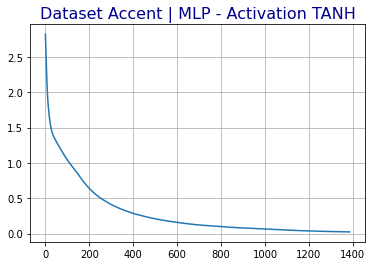

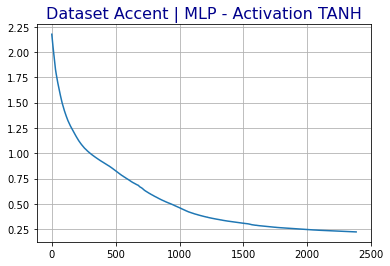

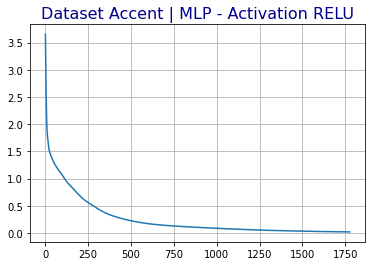

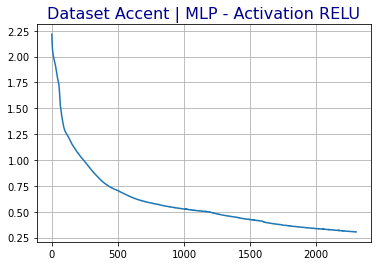

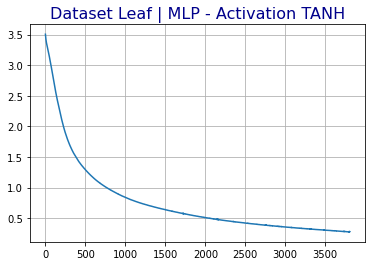

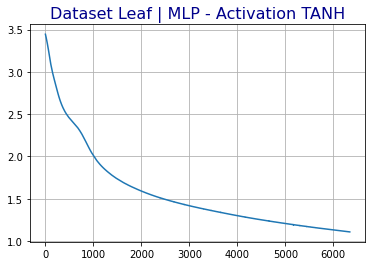

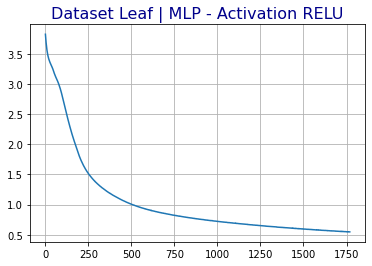

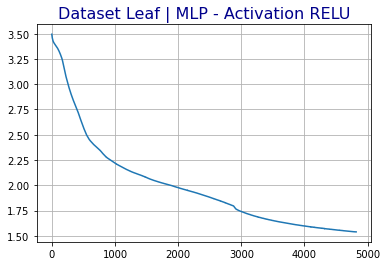

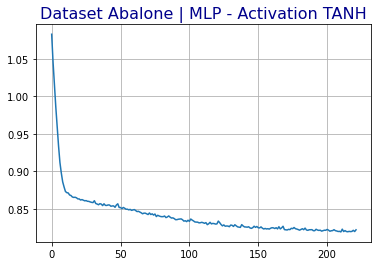

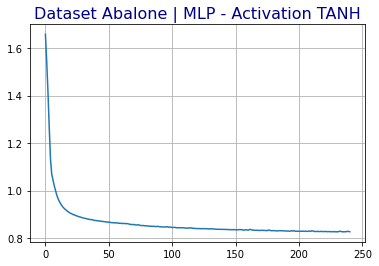

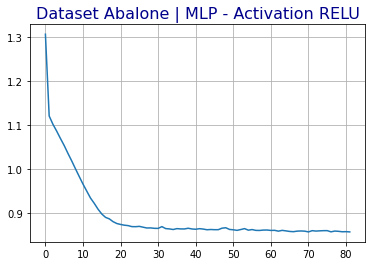

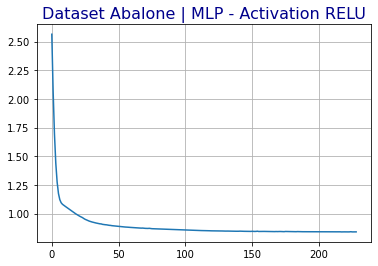

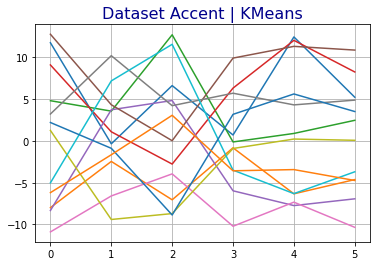

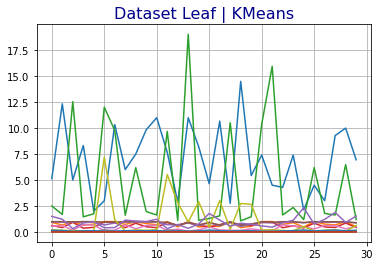

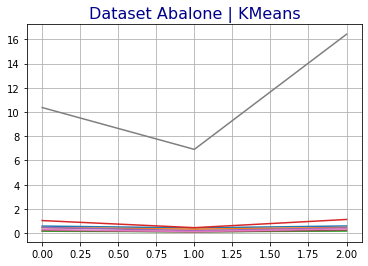

In [44]:
# Relatório
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
import matplotlib.pyplot as plt

def plotar(model, title, type='mlp'):
  font = {
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
  if (type == 'kmeans'):
    plt.plot(model.cluster_centers_)
  else: 
    plt.plot(model.loss_curve_)
  plt.title(title, fontdict=font)
  plt.grid(True)
  plt.show()

plotar(accent_tanh_tupla_one[0]['model'], 'Dataset Accent | MLP - Activation TANH')
plotar(accent_tanh_tupla_two[0]['model'], 'Dataset Accent | MLP - Activation TANH')
plotar(accent_relu_tupla_one[0]['model'], 'Dataset Accent | MLP - Activation RELU')
plotar(accent_relu_tupla_two[0]['model'], 'Dataset Accent | MLP - Activation RELU')

plotar(leaf_tanh_tupla_one[0]['model'], 'Dataset Leaf | MLP - Activation TANH')
plotar(leaf_tanh_tupla_two[0]['model'], 'Dataset Leaf | MLP - Activation TANH')
plotar(leaf_relu_tupla_one[0]['model'], 'Dataset Leaf | MLP - Activation RELU')
plotar(leaf_relu_tupla_two[0]['model'], 'Dataset Leaf | MLP - Activation RELU')

plotar(abalone_tanh_tupla_one[0]['model'], 'Dataset Abalone | MLP - Activation TANH')
plotar(abalone_tanh_tupla_two[0]['model'], 'Dataset Abalone | MLP - Activation TANH')
plotar(abalone_relu_tupla_one[0]['model'], 'Dataset Abalone | MLP - Activation RELU')
plotar(abalone_relu_tupla_two[0]['model'], 'Dataset Abalone | MLP - Activation RELU')

plotar(kmeans_accent[0]['model'], 'Dataset Accent | KMeans', 'kmeans')
plotar(kmeans_leaf[0]['model'], 'Dataset Leaf | KMeans', 'kmeans')
plotar(kmeans_abalone[0]['model'], 'Dataset Abalone | KMeans', 'kmeans')

In [30]:
# Tabelas com as taxas de erro/acerto
from tabulate import tabulate

def get_results(array):
  results = []
  for i in range(len(array)):
    results.append(array[i]['acc'])
  return results

headers = ['Data', 'Erro', 'Acerto']

print('\n-------- Arvore de decisao - Entropy --------\n') 
result_entro_accent = round(np.mean(get_results(tree_accent_entropy)) * 100)
result_entro_leaf = round(np.mean(get_results(tree_leaf_entropy)) * 100)
result_entro_abalone = round(np.mean(get_results(tree_abalone_entropy)) * 100)
print(tabulate([
                ('Accent', f'{100 - result_entro_accent}%', f'{result_entro_accent}%'),
                ('Leaf', f'{100 - result_entro_leaf}%', f'{result_entro_leaf}%'),
                ('Abalone', f'{100 - result_entro_abalone}%', f'{result_entro_abalone}%')
                ], headers=headers))

print('\n-------- Arvore de decisao - Gini --------\n') 
result_gini_accent = round(np.mean(get_results(tree_accent_gini)) * 100)
result_gini_leaf = round(np.mean(get_results(tree_leaf_gini)) * 100)
result_gini_abalone = round(np.mean(get_results(tree_abalone_gini)) * 100)
print(tabulate([
                ('Accent', f'{100 - result_gini_accent}%', f'{result_gini_accent}%'),
                ('Leaf', f'{100 - result_gini_leaf}%', f'{result_gini_leaf}%'),
                ('Abalone', f'{100 - result_gini_abalone}%', f'{result_gini_abalone}%')
                ], headers=headers))

print('\n-------- KNN CINCO VIZINHOS --------\n') 
result_knn_accent_5 = round(np.mean(get_results(knn_accent_5)) * 100)
result_knn_leaf_5 = round(np.mean(get_results(knn_leaf_5)) * 100)
result_knn_abalone_5 = round(np.mean(get_results(knn_abalone_5)) * 100)
print(tabulate([
                ('Accent', f'{100 - result_knn_accent_5}%', f'{result_knn_accent_5}%'),
                ('Leaf', f'{100 - result_knn_leaf_5}%', f'{result_knn_leaf_5}%'),
                ('Abalone', f'{100 - result_knn_abalone_5}%', f'{result_knn_abalone_5}%')
                ], headers=headers))

print('\n-------- KNN DEZ VIZINHOS --------\n') 
result_knn_accent_10 = round(np.mean(get_results(knn_accent_10)) * 100)
result_knn_leaf_10 = round(np.mean(get_results(knn_leaf_10)) * 100)
result_knn_abalone_10 = round(np.mean(get_results(knn_abalone_10)) * 100)
print(tabulate([
                ('Accent', f'{100 - result_knn_accent_10}%', f'{result_knn_accent_10}%'),
                ('Leaf', f'{100 - result_knn_leaf_10}%', f'{result_knn_leaf_10}%'),
                ('Abalone', f'{100 - result_knn_abalone_10}%', f'{result_knn_abalone_10}%')
                ], headers=headers))

print('\n-------- MLP TANH 1 --------\n') 
result_accent_tanh_tupla_one = round(np.mean(get_results(accent_tanh_tupla_one)) * 100)
result_leaf_tanh_tupla_one = round(np.mean(get_results(leaf_tanh_tupla_one)) * 100)
result_abalone_tanh_tupla_one = round(np.mean(get_results(abalone_tanh_tupla_one)) * 100)
print(tabulate([
                ('Accent', f'{100 - result_accent_tanh_tupla_one}%', f'{result_accent_tanh_tupla_one}%'),
                ('Leaf', f'{100 - result_leaf_tanh_tupla_one}%', f'{result_leaf_tanh_tupla_one}%'),
                ('Abalone', f'{100 - result_abalone_tanh_tupla_one}%', f'{result_abalone_tanh_tupla_one}%')
                ], headers=headers))

print('\n-------- MLP TANH 2 --------\n') 
result_accent_tanh_tupla_two = round(np.mean(get_results(accent_tanh_tupla_two)) * 100)
result_leaf_tanh_tupla_two = round(np.mean(get_results(leaf_tanh_tupla_two)) * 100)
result_abalone_tanh_tupla_two = round(np.mean(get_results(abalone_tanh_tupla_two)) * 100)
print(tabulate([
                ('Accent', f'{100 - result_accent_tanh_tupla_two}%', f'{result_accent_tanh_tupla_two}%'),
                ('Leaf', f'{100 - result_leaf_tanh_tupla_two}%', f'{result_leaf_tanh_tupla_two}%'),
                ('abalone', f'{100 - result_abalone_tanh_tupla_two}%', f'{result_abalone_tanh_tupla_two}%')
                ], headers=headers))

print('\n-------- MLP RELU 1 --------\n') 
result_accent_relu_tupla_one = round(np.mean(get_results(accent_relu_tupla_one)) * 100)
result_leaf_relu_tupla_one = round(np.mean(get_results(leaf_relu_tupla_one)) * 100)
result_abalone_relu_tupla_one = round(np.mean(get_results(abalone_relu_tupla_one)) * 100)
print(tabulate([
                ('Accent', f'{100 - result_accent_relu_tupla_one}%', f'{result_accent_relu_tupla_one}%'),
                ('Leaf', f'{100 - result_leaf_relu_tupla_one}%', f'{result_leaf_relu_tupla_one}%'),
                ('Abalone', f'{100 - result_abalone_relu_tupla_one}%', f'{result_abalone_relu_tupla_one}%')
                ], headers=headers))

print('\n-------- MLP RELU 2 --------\n') 
result_accent_relu_tupla_two = round(np.mean(get_results(accent_relu_tupla_two)) * 100)
result_leaf_relu_tupla_two = round(np.mean(get_results(leaf_relu_tupla_two)) * 100)
result_abalone_relu_tupla_two = round(np.mean(get_results(abalone_relu_tupla_two)) * 100)
print(tabulate([
                ('Accent', f'{100 - result_accent_relu_tupla_two}%', f'{result_accent_relu_tupla_two}%'),
                ('Leaf', f'{100 - result_leaf_relu_tupla_two}%', f'{result_leaf_relu_tupla_two}%'),
                ('abalone', f'{100 - result_abalone_relu_tupla_two}%', f'{result_abalone_relu_tupla_two}%')
                ], headers=headers))

print('\n-------- KMEANS --------\n') 
result_kmeans_accent = round(np.mean(get_results(kmeans_accent)) * 100)
result_kmeans_leaf = round(np.mean(get_results(kmeans_leaf)) * 100)
result_kmeans_abalone = round(np.mean(get_results(kmeans_abalone)) * 100)
print(tabulate([
                ('Accent', f'{100 - result_kmeans_accent}%', f'{result_kmeans_accent}%'),
                ('Leaf', f'{100 - result_kmeans_leaf}%', f'{result_kmeans_leaf}%'),
                ('abalone', f'{100 - result_kmeans_abalone}%', f'{result_kmeans_abalone}%')
                ], headers=headers))

print()




-------- Arvore de decisao - Entropy --------

Data     Erro    Acerto
-------  ------  --------
Accent   38.0%   62.0%
Leaf     37.0%   63.0%
Abalone  51.0%   49.0%

-------- Arvore de decisao - Gini --------

Data     Erro    Acerto
-------  ------  --------
Accent   37.0%   63.0%
Leaf     38.0%   62.0%
Abalone  51.0%   49.0%

-------- KNN CINCO VIZINHOS --------

Data     Erro    Acerto
-------  ------  --------
Accent   25.0%   75.0%
Leaf     83.0%   17.0%
Abalone  47.0%   53.0%

-------- KNN DEZ VIZINHOS --------

Data     Erro    Acerto
-------  ------  --------
Accent   28.0%   72.0%
Leaf     83.0%   17.0%
Abalone  47.0%   53.0%

-------- MLP TANH 1 --------

Data     Erro    Acerto
-------  ------  --------
Accent   27.0%   73.0%
Leaf     36.0%   64.0%
Abalone  45.0%   55.0%

-------- MLP TANH 2 --------

Data     Erro    Acerto
-------  ------  --------
Accent   38.0%   62.0%
Leaf     54.0%   46.0%
abalone  47.0%   53.0%

-------- MLP RELU 1 --------

Data     Erro    Acerto
